**Given a Bank customer, can we build a classifier which can determine whether they will leave in the next 6 months or not?**

In [19]:
import pandas as pd
from matplotlib import pyplot as plt 
import numpy as np
%matplotlib inline

In [20]:
df=pd.read_csv('/content/drive/MyDrive/Churn_Modelling.csv')
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
8568,8569,15779496,Sykes,615,France,Male,64,0,81564.10,2,0,1,35896.09,0
3423,3424,15660147,Dore,493,Spain,Male,32,8,46161.18,1,1,1,79577.40,0
9606,9607,15678057,Lombardi,524,France,Male,44,10,118569.03,2,0,0,82117.20,0
1877,1878,15643630,Quaife,770,Spain,Male,55,9,63127.41,2,1,0,185211.28,1
8741,8742,15762855,Hill,622,Spain,Female,23,8,0.00,2,1,1,131389.39,0


In [21]:
df.drop('RowNumber',axis='columns',inplace=True)

In [22]:
df.dtypes

CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [23]:
df.isna().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [24]:
df.shape

(10000, 13)

In [25]:
df.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


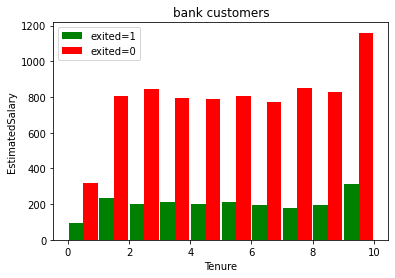

In [26]:
tenure_exited_yes=df[df.Exited==1].Tenure
tenure_exited_no=df[df.Exited==0].Tenure

plt.xlabel("Tenure")
plt.ylabel("EstimatedSalary")
plt.title("bank customers")

plt.hist([tenure_exited_yes,tenure_exited_no], rwidth=0.95, color=['green','red'],label=['exited=1','exited=0'])
plt.legend()

In [27]:
df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [28]:
df['Gender'].replace({'Female':1,'Male':0},inplace=True)

In [29]:
df.Gender.unique()

array([1, 0])

In [30]:
df1=pd.get_dummies(data=df, columns=['Surname','Geography'])
df1.columns

Index(['CustomerId', 'CreditScore', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       ...
       'Surname_Zotova', 'Surname_Zox', 'Surname_Zubarev', 'Surname_Zubareva',
       'Surname_Zuev', 'Surname_Zuyev', 'Surname_Zuyeva', 'Geography_France',
       'Geography_Germany', 'Geography_Spain'],
      dtype='object', length=2946)

In [31]:
df1

,CustomerId,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,...,Surname_Zotova,Surname_Zox,Surname_Zubarev,Surname_Zubareva,Surname_Zuev,Surname_Zuyev,Surname_Zuyeva,Geography_France,Geography_Germany,Geography_Spain
0,15634602,619,1,42,2,0.00,1,1,1,101348.88,...,0,0,0,0,0,0,0,1,0,0
1,15647311,608,1,41,1,83807.86,1,0,1,112542.58,...,0,0,0,0,0,0,0,0,0,1
2,15619304,502,1,42,8,159660.80,3,1,0,113931.57,...,0,0,0,0,0,0,0,1,0,0
3,15701354,699,1,39,1,0.00,2,0,0,93826.63,...,0,0,0,0,0,0,0,1,0,0
4,15737888,850,1,43,2,125510.82,1,1,1,79084.10,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,0,39,5,0.00,2,1,0,96270.64,...,0,0,0,0,0,0,0,1,0,0
9996,15569892,516,0,35,10,57369.61,1,1,1,101699.77,...,0,0,0,0,0,0,0,1,0,0
9997,15584532,709,1,36,7,0.00,1,0,1,42085.58,...,0,0,0,0,0,0,0,1,0,0
9998,15682355,772,0,42,3,75075.31,2,1,0,92888.52,...,0,0,0,0,0,0,0,0,1,0


In [32]:
df1.dtypes

CustomerId           int64
CreditScore          int64
Gender               int64
Age                  int64
Tenure               int64
                     ...  
Surname_Zuyev        uint8
Surname_Zuyeva       uint8
Geography_France     uint8
Geography_Germany    uint8
Geography_Spain      uint8
Length: 2946, dtype: object

In [33]:
cols_to_scale=['CustomerId','CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df1[cols_to_scale]=scaler.fit_transform(df1[cols_to_scale])

In [34]:
for col in df1:
  print(f'{col}: {df1[col].unique()}')

CustomerId: [0.27561613 0.32645436 0.21442143 ... 0.07532731 0.46663653 0.25048302]
CreditScore: [0.538 0.516 0.304 0.698 1.    0.59  0.944 0.052 0.302 0.668 0.356 0.294
 0.252 0.398 0.57  0.532 0.606 0.474 0.752 0.764 0.572 0.32  0.638 0.992
 0.454 0.812 0.442 0.448 0.122 0.482 0.366 0.406 0.34  0.744 0.25  0.28
 0.908 0.464 0.244 0.23  0.412 0.968 0.62  0.852 0.958 0.574 0.4   0.696
 0.47  0.876 0.61  0.502 0.612 0.75  0.322 0.528 0.784 0.674 0.41  0.506
 0.802 0.462 0.77  0.622 0.65  0.776 0.926 0.614 0.508 0.338 0.628 0.656
 0.814 0.132 0.63  0.854 0.386 0.312 0.286 0.604 0.8   0.758 0.592 0.594
 0.916 0.348 0.838 0.76  0.33  0.846 0.928 0.72  0.126 0.546 0.64  0.544
 0.87  0.51  0.258 0.67  0.376 0.424 0.742 0.556 0.636 0.956 0.648 0.55
 0.164 0.84  0.816 0.89  0.672 0.878 0.478 0.222 0.468 0.458 0.626 0.664
 0.886 0.682 0.27  0.6   0.808 0.37  0.732 0.378 0.712 0.472 0.562 0.734
 0.9   0.666 0.708 0.53  0.634 0.268 0.26  0.456 0.324 0.512 0.494 0.856
 0.328 0.35  0.73  0.46  0.91

In [35]:
X = df1.drop('Exited',axis='columns')
y = df1['Exited']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2,random_state=5)

In [36]:
X_train.shape

(8000, 2945)

In [38]:
X_test.shape


(2000, 2945)

In [39]:
X_train[:10]


,CustomerId,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,...,Surname_Zotova,Surname_Zox,Surname_Zubarev,Surname_Zubareva,Surname_Zuev,Surname_Zuyev,Surname_Zuyeva,Geography_France,Geography_Germany,Geography_Spain
7751,0.091340,0.800,1,0.283784,0.6,0.000000,0.333333,0,0,0.096273,...,0,0,0,0,0,0,0,0,0,1
4154,0.550968,0.752,0,0.216216,0.3,0.000000,0.333333,1,0,0.981478,...,0,0,0,0,0,0,0,1,0,0
3881,0.914340,0.476,1,0.621622,0.3,0.000000,0.000000,1,1,0.948551,...,0,0,0,0,0,0,0,1,0,0
9238,0.293741,0.846,1,0.432432,0.4,0.000000,0.333333,1,0,0.646869,...,0,0,0,0,0,0,0,1,0,0
5210,0.693042,0.402,0,0.229730,0.7,0.517012,0.333333,0,0,0.434670,...,0,0,0,0,0,0,0,1,0,0
7487,0.878703,0.602,1,0.513514,0.4,0.000000,0.000000,0,0,0.421898,...,0,0,0,0,0,0,0,1,0,0
7542,0.812340,0.314,1,0.216216,0.4,0.000000,0.333333,1,1,0.303413,...,0,0,0,0,0,0,0,0,0,1
7524,0.217618,0.620,1,0.297297,0.8,0.666330,0.000000,1,1,0.925815,...,0,0,0,0,0,0,0,1,0,0
9412,0.635816,0.750,0,0.108108,0.6,0.393324,0.000000,0,0,0.668609,...,0,0,0,0,0,0,0,1,0,0
6377,0.092816,0.684,0,0.202703,0.9,0.000000,0.000000,1,0,0.567526,...,0,0,0,0,0,0,0,1,0,0


In [40]:
len(X_train.columns)

2945

In [42]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
                          keras.layers.Dense(2945, input_shape=(2945,), activation='relu'),
                          keras.layers.Dense(2500, activation='relu'),
                          keras.layers.Dense(1, activation='sigmoid'),
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train,y_train, epochs=10)

Epoch 1/10
250/250 [==============================] - 39s 148ms/step - loss: 0.4689 - accuracy: 0.8026
Epoch 2/10
250/250 [==============================] - 35s 139ms/step - loss: 0.3395 - accuracy: 0.8546
Epoch 3/10
250/250 [==============================] - 35s 139ms/step - loss: 0.2028 - accuracy: 0.9184
Epoch 4/10
250/250 [==============================] - 35s 139ms/step - loss: 0.1172 - accuracy: 0.9531
Epoch 5/10
250/250 [==============================] - 35s 140ms/step - loss: 0.0666 - accuracy: 0.9729
Epoch 6/10
250/250 [==============================] - 35s 139ms/step - loss: 0.0488 - accuracy: 0.9794
Epoch 7/10
250/250 [==============================] - 35s 139ms/step - loss: 0.0328 - accuracy: 0.9870
Epoch 8/10
250/250 [==============================] - 35s 139ms/step - loss: 0.0248 - accuracy: 0.9905
Epoch 9/10
250/250 [==============================] - 35s 140ms/step - loss: 0.0195 - accuracy: 0.9924
Epoch 10/10
250/250 [==============================] - 35s 142ms/step - l

In [43]:
model.evaluate(X_test,y_test)

63/63 [==============================] - 4s 62ms/step - loss: 1.3938 - accuracy: 0.7120


[1.3938206434249878, 0.7120000123977661]

In [44]:
yp = model.predict(X_test)
yp[:5]

array([[8.8928689e-05],
       [2.1038055e-03],
       [2.5137547e-06],
       [3.1871796e-02],
       [1.7881215e-05]], dtype=float32)

In [45]:
y_pred = []
for element in yp:
  if element > 0.5:
    y_pred.append(1)
  else:
    y_pred.append(0)

In [46]:
y_pred[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

In [47]:
y_test[:10]

7054    0
442     0
3954    0
2288    0
3196    0
6178    0
8351    0
5658    1
2065    0
413     1
Name: Exited, dtype: int64

In [48]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.77      0.81      1595
           1       0.35      0.48      0.40       405

    accuracy                           0.71      2000
   macro avg       0.60      0.62      0.61      2000
weighted avg       0.75      0.71      0.73      2000

